# <h2>1) Exploring the dataset</h2>
<p>Reading the image data and their corresponding captions from the flick dataset folder. Showing the image and captions to get the insighs of the data. Dowload link for the dataset used <a href="https://www.kaggle.com/adityajn105/flickr8k">here</a></p>

In [9]:
#location of the data 
data_location =  "C:\\Users\\EXTREME_RED\\Downloads\\GitHub\\Dataset\\VG\\VG_train\\"
!ls $data_location

1001.jpg
1025.jpg
1060.jpg
1068.jpg
108.jpg
1081.jpg
1082.jpg
1090.jpg
1122.jpg
1159.jpg
1159260.jpg
1159346.jpg
1159365.jpg
1159378.jpg
1159380.jpg
1159430.jpg
1159527.jpg
1159539.jpg
1159544.jpg
1159604.jpg
1159610.jpg
1159642.jpg
1159644.jpg
1159666.jpg
1159679.jpg
1159765.jpg
1159814.jpg
1159815.jpg
1159860.jpg
1159875.jpg
1160229.jpg
1168.jpg
1170.jpg
121.jpg
1222.jpg
1231.jpg
1242.jpg
1243.jpg
1256.jpg
1274.jpg
1291.jpg
131.jpg
1321.jpg
1326.jpg
1338.jpg
1348.jpg
137.jpg
139.jpg
1401.jpg
141.jpg
1466.jpg
1472.jpg
1473.jpg
150371.jpg
150415.jpg
150495.jpg
1530.jpg
1547.jpg
1582.jpg
1591981.jpg
1592056.jpg
1592199.jpg
1592219.jpg
1592320.jpg
1592672.jpg
1592684.jpg
1593071.jpg
1593117.jpg
1593139.jpg
1610.jpg
1659.jpg
1665.jpg
1677.jpg
1701.jpg
175.jpg
177.jpg
179.jpg
1857.jpg
186.jpg
1890.jpg
194.jpg
199.jpg
2037.jpg
2073.jpg
2133.jpg
2157.jpg
221.jpg
2226.jpg
2234.jpg
2263.jpg
2275.jpg
2292.jpg
2315365.jpg
2315421.jpg
2315544.jpg
2315551.jpg
2315570.jpg
2315573.jpg
2315586.jpg
23

In [8]:
'''import pandas as pd

# Read the text file line by line
with open('paragraphs.txt', 'r') as file:
    lines = file.readlines()

# Initialize empty lists to store image and caption data
images = []
captions = []

# Iterate over each line in the file
for line in lines[1:]:  # Skip the header line
    # Split the line into image and caption components
    image, caption = line.strip().split(',', 1)
    # Append the image and caption to the respective lists
    images.append(image)
    captions.append(caption)

# Create a DataFrame from the lists of image and caption data
df = pd.DataFrame({'image': images, 'caption': captions})
print("There are {} image to captions".format(len(df)))
# Display the DataFrame
print(df.head())
'''

There are 19561 image to captions
         image                                            caption
0  2356347.jpg  A large building with bars on the windows in f...
1  2317429.jpg  A white round plate is on a table with a plast...
2  2414610.jpg  A woman in a blue tennis outfit stands on a gr...
3  2365091.jpg  A large red and white train is traveling on tr...
4  2383120.jpg  A very clean and tidy a bathroom. Everything i...


In [20]:
#reading the text data 
import pandas as pd
caption_file = 'train.csv'
df = pd.read_csv(caption_file)
print("There are {} image to captions".format(len(df)))
df.head(7)

There are 14575 image to captions


,image,caption,relationships
0,80.jpg,This is a cute little kitchen. It had brown wo...,"jar holding utensil, rug ON floor"
1,84.jpg,The doors leading to the outside of the home a...,"tassels ON pillow, candle on top of books, tab..."
2,99.jpg,There are several tables with white table clot...,"candle ON candle stand, flame ON candle, paint..."
3,108.jpg,"Cars pedestrians, and scooters or motorcycles ...","sign ON pole, tree ON street, pole with sign, ..."
4,121.jpg,There is a large white book shelf against the ...,"hole IN guitar, dvd IN shelf, dvd on a shelf, ..."
5,131.jpg,a bunch of people are walking in a town. they ...,"woman sitting on bench, shoe OF person, shoe o..."
6,137.jpg,The sky is overcast and cloudy. There's a bike...,"sign ON pole, bicycle ON pole, bicycle ON side..."


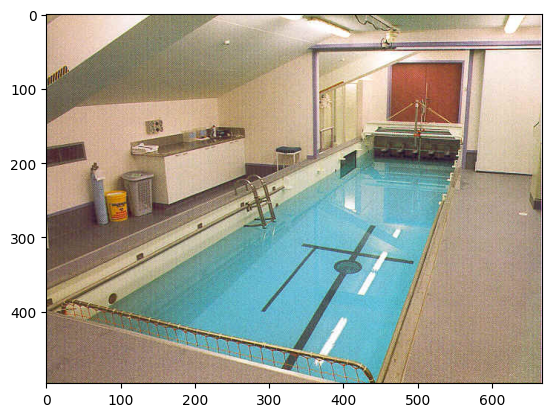

Caption: A large room has a pool inside. The pool is blue and it has black lines on the bottom of it. There is a metal ladder leading down into the pool. There is a metal railing on one of the sides of the pool. The walls of the room are white. There are gray and yellow trash cans.
Relationship: bucket IN pool room, cushion beside pool, rail ON end, water IN pool, bottom OF pool, door ON wall, drain ON floor, rail inside pool, counter beside pool, stool with cushion, light reflected in pool, lines are on pool, items are on a counter, vent ON wall, lines are on bottom of pool, bucket OF bucket, rail to pool, lines ON bottom, end OF pool


'for i in range(data_idx,data_idx+5):\n    )'

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#select any index from the whole dataset 
#single image has 5 captions
#so, select indx as: 1,6,11,16...
data_idx = 11

#eg path to be plot: ../input/flickr8k/Images/1000268201_693b08cb0e.jpg
image_path = data_location+str(df.iloc[data_idx,0])
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()
print("Caption:",df.iloc[data_idx,1])
print("Relationship:",df.iloc[data_idx,2])
#image consits of 5 captions,
#showing all 5 captions of the image of the given idx 
'''for i in range(data_idx,data_idx+5):
    )'''


<h2>2) Writing the custom dataset</h2>
<p>Writing the custom torch dataset class so, that we can abastract out the dataloading steps during the training and validation process</p>
<p>Here, dataloader is created which gives the batch of image and its captions with following processing done:</p>

<li>caption word tokenized to unique numbers</li>
<li>vocab instance created to store all the relivent words in the datasets</li>
<li>each batch, caption padded to have same sequence length</li>
<li>image resized to the desired size and converted into captions</li>

<br><p>In this way the dataprocessing is done, and the dataloader is ready to be used with <b>Pytorch</b></p>

In [15]:
#imports 
import os
from collections import Counter
import spacy
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

from PIL import Image

In [16]:
#using spacy for the better text tokenization 
spacy_eng = spacy.load("en_core_web_sm")

#example
text = "This is a good place to find a city"
[token.text.lower() for token in spacy_eng.tokenizer(text)]

['this', 'is', 'a', 'good', 'place', 'to', 'find', 'a', 'city']

In [17]:
class Vocabulary:
    def __init__(self,freq_threshold):
        #setting the pre-reserved tokens int to string tokens
        self.itos = {0:"<PAD>",1:"<SOS>",2:"<EOS>",3:"<UNK>"}
        
        #string to int tokens
        #its reverse dict self.itos
        self.stoi = {v:k for k,v in self.itos.items()}
        
        self.freq_threshold = freq_threshold
        
    def __len__(self): return len(self.itos)
    
    @staticmethod
    def tokenize(text):
        return [token.text.lower() for token in spacy_eng.tokenizer(text)]
    
    def build_vocab(self, sentence_list):
        frequencies = Counter()
        idx = 4
        
        for sentence in sentence_list:
            for word in self.tokenize(sentence):
                frequencies[word] += 1
                
                #add the word to the vocab if it reaches minum frequecy threshold
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
    
    def numericalize(self,text):
        """ For each word in the text corresponding index token for that word form the vocab built as list """
        tokenized_text = self.tokenize(text)
        return [ self.stoi[token] if token in self.stoi else self.stoi["<UNK>"] for token in tokenized_text ]    

In [30]:
#testing the vicab class 
v = Vocabulary(freq_threshold=1)

v.build_vocab(["This is a good place to find a city"])
print(v.stoi)
print(v.numericalize("This is a good place to find a city here!!"))

{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3, 'this': 4, 'is': 5, 'a': 6, 'good': 7, 'place': 8, 'to': 9, 'find': 10, 'city': 11}
[4, 5, 6, 7, 8, 9, 10, 6, 11, 3, 3, 3]


In [45]:
class FlickrDataset(Dataset):
    """
    FlickrDataset
    """
    def __init__(self,root_dir,captions_file,transform=None,freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]
        self.relationships = self.df["relationships"]
        
        #Initialize vocabulary and build vocab
        self.vocab = Vocabulary(freq_threshold)
        self.vocab.build_vocab(self.captions.tolist())
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        relationship = self.relationships[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        #numericalize the caption text
        caption_vec = []
        caption_vec += [self.vocab.stoi["<SOS>"]]
        caption_vec += self.vocab.numericalize(caption)
        caption_vec += [self.vocab.stoi["<EOS>"]]
        
        #numericalize the relationship text
        relationship_vec = []
        relationship_vec += [self.vocab.stoi["<SOS>"]]
        relationship_vec += self.vocab.numericalize(relationship)
        relationship_vec += [self.vocab.stoi["<EOS>"]]
        
        return img, torch.tensor(caption_vec), torch.tensor(relationship_vec) 

In [42]:
#defing the transform to be applied
transforms = T.Compose([
    T.Resize((224,224)),
    T.ToTensor()
])

In [43]:
def show_image(inp, title=None, rel=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    if rel is not None:
        plt.xlabel(rel)    
    plt.pause(0.001)  # pause a bit so that plots are updated

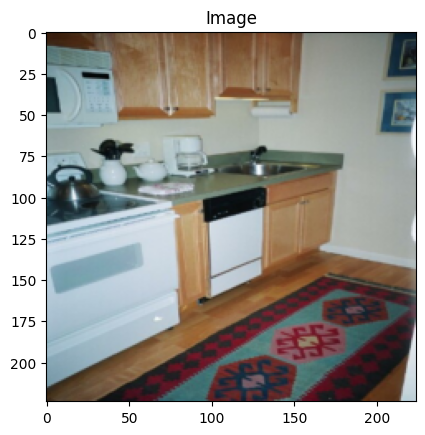

Cap Token: tensor([   1,   30,    7,    5, 2992,  306,  221,    4,   29, 1071,   75,   78,
         292,    4,    8,    7,    5,  258,   99,   13,    5,  287,  410, 4022,
          16,   42,   11,   36,    4,    6,  311,   12,  995,   11, 1000,    9,
          14,    4,    8,    9,   37,  632,  712,   10,   18,   23,    4,    6,
         221,  164,    7,   31,   13,   14, 1508,    4,    5,  746, 1496,  158,
          10,    6,  368,    4,    5,    3,  635,    7, 1490,  169,    6,  369,
         534,  205,    6,   14,   23,    4,    2])
Rel Token: tensor([   1,  963,  128, 1460,   12,  272,   10,   99,    2])
Sentence:
['<SOS>', 'this', 'is', 'a', 'cute', 'little', 'kitchen', '.', 'it', 'had', 'brown', 'wooden', 'cabinets', '.', 'there', 'is', 'a', 'wood', 'floor', 'with', 'a', 'colorful', 'carpet', 'runner', 'in', 'blue', 'and', 'red', '.', 'the', 'oven', ',', 'dishwasher', 'and', 'microwave', 'are', 'white', '.', 'there', 'are', 'two', 'framed', 'pictures', 'on', 'one', 'wall', '.', '

In [46]:
#testing the dataset class
dataset =  FlickrDataset(
    root_dir = data_location,
    captions_file = "train.csv",
    transform=transforms
)



img, caps, rel = dataset[0]
show_image(img,"Image")
print("Cap Token:",caps)
print("Rel Token:",rel)
print("Sentence:")
print([dataset.vocab.itos[token] for token in caps.tolist()])
print("Relationship:")
print([dataset.vocab.itos[token] for token in rel.tolist()])

In [38]:
class CapsCollate:
    """
    Collate to apply the padding to the captions with dataloader
    """
    def __init__(self,pad_idx,batch_first=False):
        self.pad_idx = pad_idx
        self.batch_first = batch_first
    
    def __call__(self,batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs,dim=0)
        
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=self.batch_first, padding_value=self.pad_idx)

        rel_targets = [item[2] for item in batch]
        rel_targets = pad_sequence(rel_targets, batch_first=self.batch_first, padding_value=self.pad_idx)
        return imgs, targets, rel_targets

In [47]:
#writing the dataloader
#setting the constants
BATCH_SIZE = 4
NUM_WORKER = 1

#token to represent the padding
pad_idx = dataset.vocab.stoi["<PAD>"]

data_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=CapsCollate(pad_idx=pad_idx,batch_first=True)
)

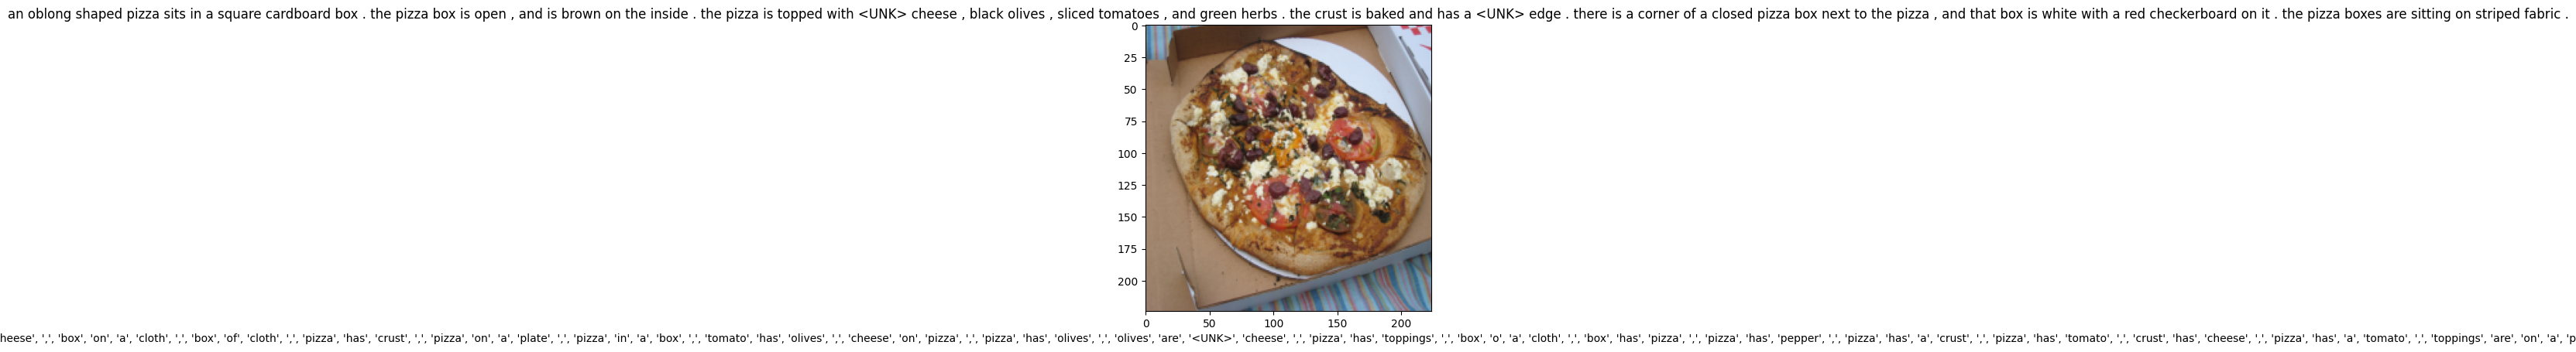

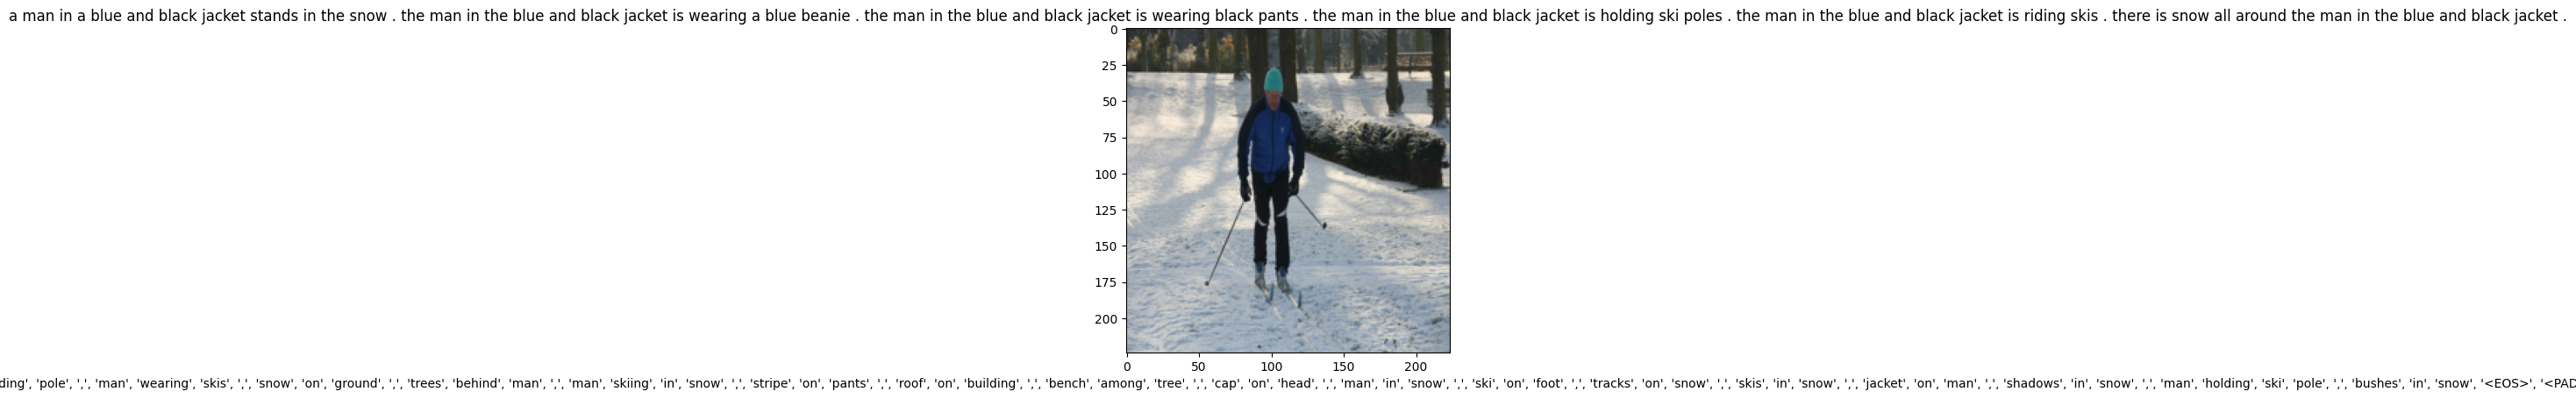

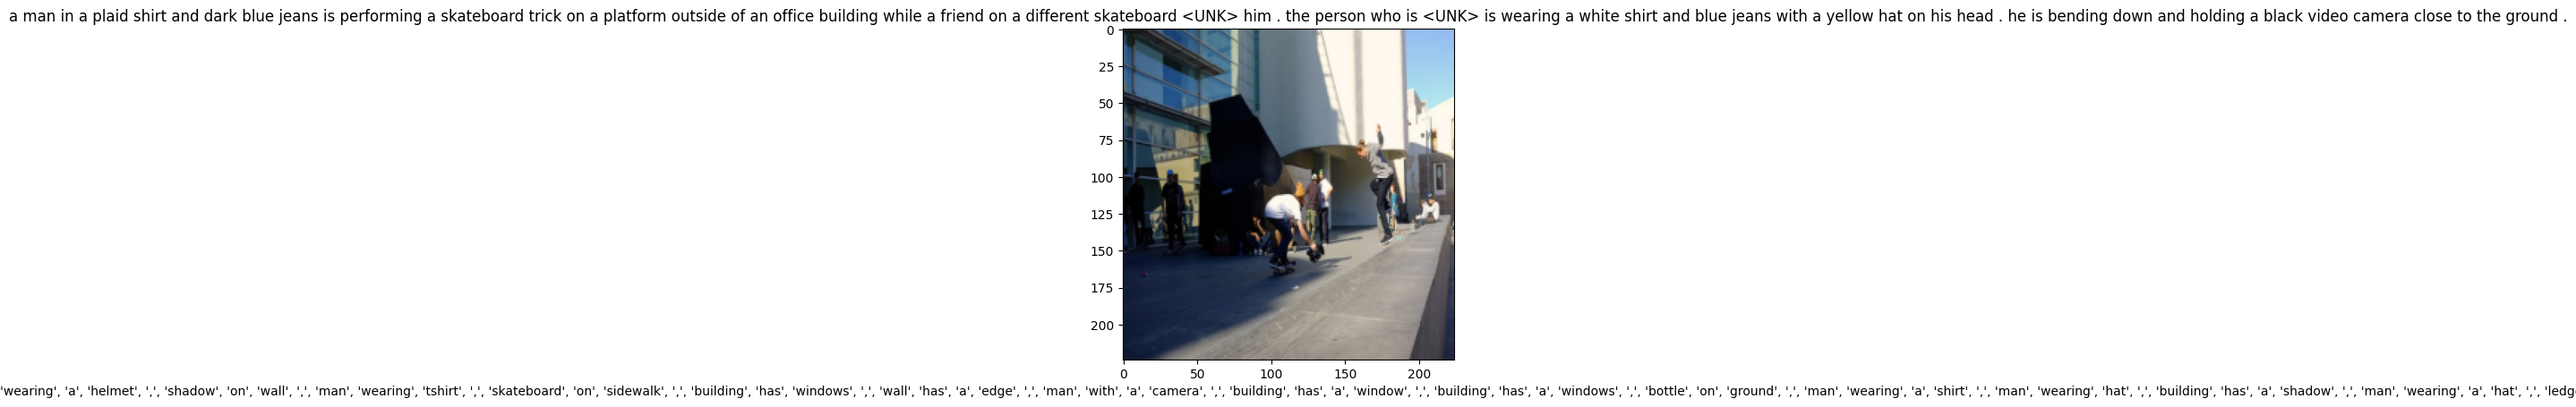

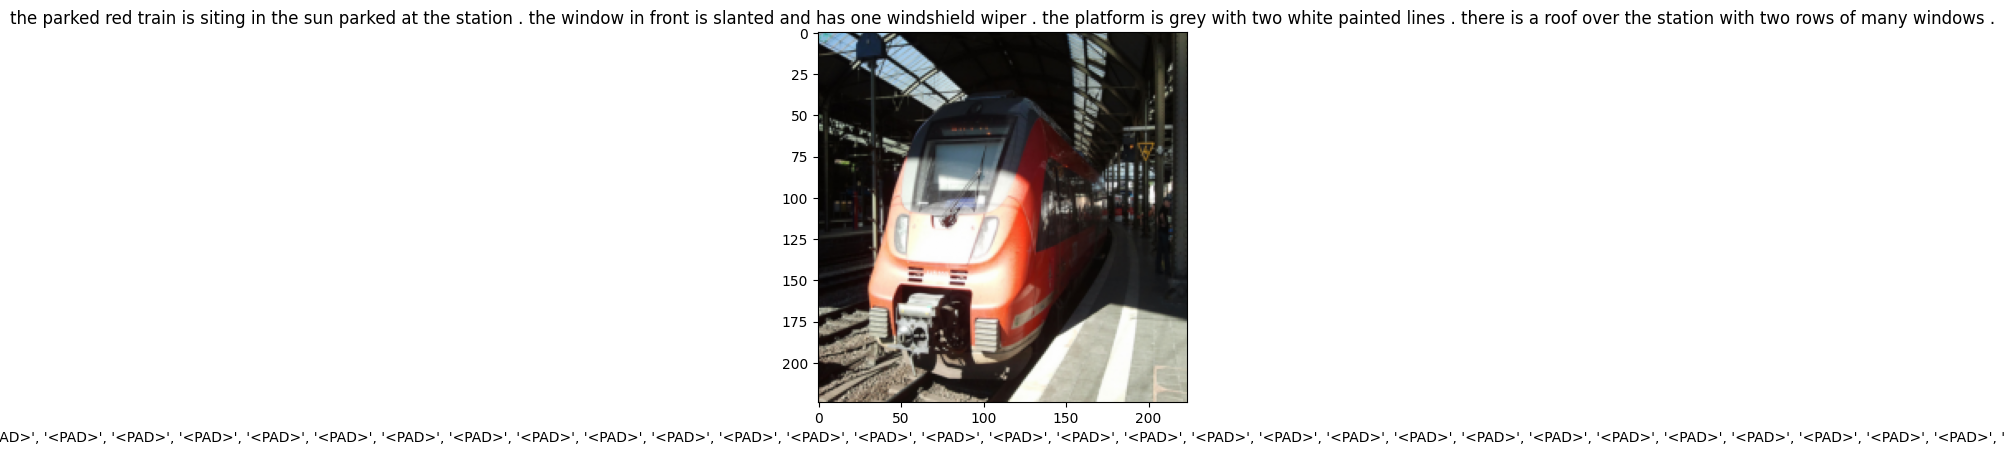

In [48]:
#generating the iterator from the dataloader
dataiter = iter(data_loader)

#getting the next batch
batch = next(dataiter)

#unpacking the batch
images, captions, relationship = batch

#showing info of image in single batch
for i in range(BATCH_SIZE):
    img,cap,rel = images[i],captions[i], relationship[i]
    caption_label = [dataset.vocab.itos[token] for token in cap.tolist()]
    relationship_label = [dataset.vocab.itos[token] for token in rel.tolist()] 
    eos_index = caption_label.index('<EOS>')
    caption_label = caption_label[1:eos_index]
    caption_label = ' '.join(caption_label)                      
    show_image(img,caption_label, relationship_label)
    plt.show()